## Heart Disease Prediction Project
### 🧪 Medical Term Explanations

- **🩸 Glucose**:
  - Glucose is the main type of sugar in your blood.
  - It gives your body energy, especially to the brain and muscles.
  - High glucose levels can indicate diabetes or poor diet control.

- **🧬 Cholesterol**:
  - Cholesterol is a fatty substance in your blood.
  - Your body needs some cholesterol, but too much can block blood vessels.
  - High cholesterol is a major risk factor for heart disease.

- **💓 ap_hi (Systolic Blood Pressure)**:
  - The top number in a blood pressure reading.
  - It measures pressure when the heart **beats** and pumps blood.
  - Normal value: around **120 mmHg**.

- **💤 ap_lo (Diastolic Blood Pressure)**:
  - The bottom number in a blood pressure reading.
  - It measures pressure when the heart is **at rest** between beats.
  - Normal value: around **80 mmHg**.


### Features:
- Age | Objective Feature | age | int (days) <br>
- Height | Objective Feature | height | int (cm) | <br>
- Weight | Objective Feature | weight | float (kg) | <br>
- Gender | Objective Feature | gender | categorical code | <br>
- Systolic blood pressure | Examination Feature | ap_hi | int | <br>
- Diastolic blood pressure | Examination Feature | ap_lo | int | <br>
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal | <br>
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal | <br>
- Smoking | Subjective Feature | smoke | binary | <br>
- Alcohol intake | Subjective Feature | alco | binary | <br>
- Physical activity | Subjective Feature | active | binary | <br>
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary | <br>

### 🩺 Cardio Dataset Column Descriptions

- **age**: Age of the patient in days (convert to years for readability).
- **gender**: Gender of the patient (1 = female, 2 = male).
- **height**: Height of the patient in centimeters.
- **weight**: Weight of the patient in kilograms.
- **ap_hi**: Systolic blood pressure (top number).
- **ap_lo**: Diastolic blood pressure (bottom number).
- **cholesterol**: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal).
- **gluc**: Glucose level (1 = normal, 2 = above normal, 3 = well above normal).
- **smoke**: Whether the patient smokes (0 = no, 1 = yes).
- **alco**: Whether the patient consumes alcohol (0 = no, 1 = yes).
- **active**: Whether the patient is physically active (0 = no, 1 = yes).
- **cardio**: Target variable indicating cardiovascular disease (0 = no, 1 = yes).


## Tools Preparation 

In [63]:
# Data manipulation and visualization
import numpy as np                     # For numerical operations and arrays
import pandas as pd                   # For working with data in table (DataFrame) format
import matplotlib.pyplot as plt       # For plotting graphs and charts
import seaborn as sns                 # For advanced statistical data visualization

# For Jupyter Notebook plotting
%matplotlib inline
# Machine Learning Models

from sklearn.linear_model import LogisticRegression            # Logistic Regression for binary classification
from sklearn.neighbors import KNeighborsClassifier             # KNN: predicts based on nearest neighbors
from sklearn.ensemble import RandomForestClassifier            # Random Forest: bagged decision trees
from sklearn.ensemble import HistGradientBoostingClassifier    # HGB: fast, scalable gradient boosting from scikit-learn
from sklearn.svm import SVC                                    # SVM: separates classes with hyperplanes
from sklearn.naive_bayes import GaussianNB                     # Naive Bayes: assumes feature independence (good for text or simple problems)
from sklearn.tree import DecisionTreeClassifier                # Simple decision tree classifier
from sklearn.ensemble import VotingClassifier                  # Combines multiple models by voting
from sklearn.ensemble import StackingClassifier                # Combines models using a meta-model

# ✅ Optional external models (must be installed separately)
from xgboost import XGBClassifier                              # XGBoost: high-performance gradient boosting
from lightgbm import LGBMClassifier                            # LightGBM: fast, memory-efficient gradient boosting


# Model Evaluation and Selection
from sklearn.model_selection import train_test_split, cross_val_score  # Split data, evaluate with cross-validation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV   # Hyperparameter tuning

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report    # Confusion matrix and performance summary
from sklearn.metrics import precision_score, recall_score, f1_score    # Key classification metrics
from sklearn.metrics import RocCurveDisplay

In [64]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.shape

(70000, 13)

In [65]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [66]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


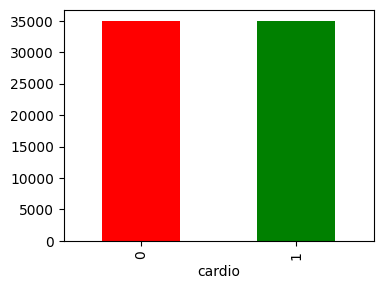

In [67]:
plt.figure(figsize=(4, 3))  # width=4, height=3 (in inches)
df['cardio'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.show()

In [68]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [69]:
df.gender.value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [70]:
pd.crosstab(df.cardio,df.gender)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


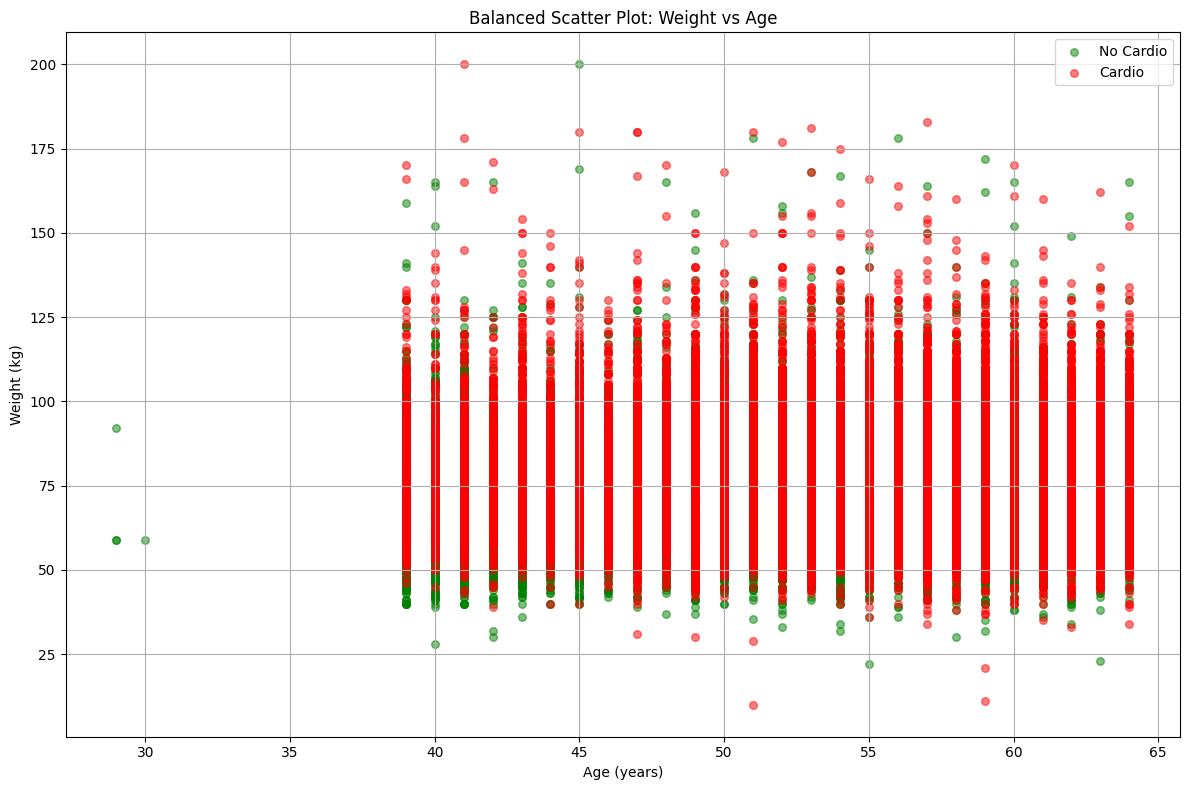

In [71]:
# Convert age from days to years for visualization
df['age_years'] = (df['age'] / 365).astype(int)

# Split dataset into two classes
cardio_yes = df[df['cardio'] == 1]
cardio_no = df[df['cardio'] == 0]

# Check class sizes
count_yes = len(cardio_yes)
count_no = len(cardio_no)

# Balance the dataset
if count_yes > count_no:
    cardio_yes_sample = cardio_yes.sample(n=count_no, random_state=1)
    df_balanced = pd.concat([cardio_no, cardio_yes_sample])
else:
    cardio_no_sample = cardio_no.sample(n=count_yes, random_state=1)
    df_balanced = pd.concat([cardio_no_sample, cardio_yes])

# Plot scatter
plt.figure(figsize=(12, 8))
plt.scatter(df_balanced[df_balanced['cardio'] == 0]['age_years'],
            df_balanced[df_balanced['cardio'] == 0]['weight'],
            color='green', label='No Cardio', alpha=0.5, s=30)
plt.scatter(df_balanced[df_balanced['cardio'] == 1]['age_years'],
            df_balanced[df_balanced['cardio'] == 1]['weight'],
            color='red', label='Cardio', alpha=0.5, s=30)

plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.title('Balanced Scatter Plot: Weight vs Age')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

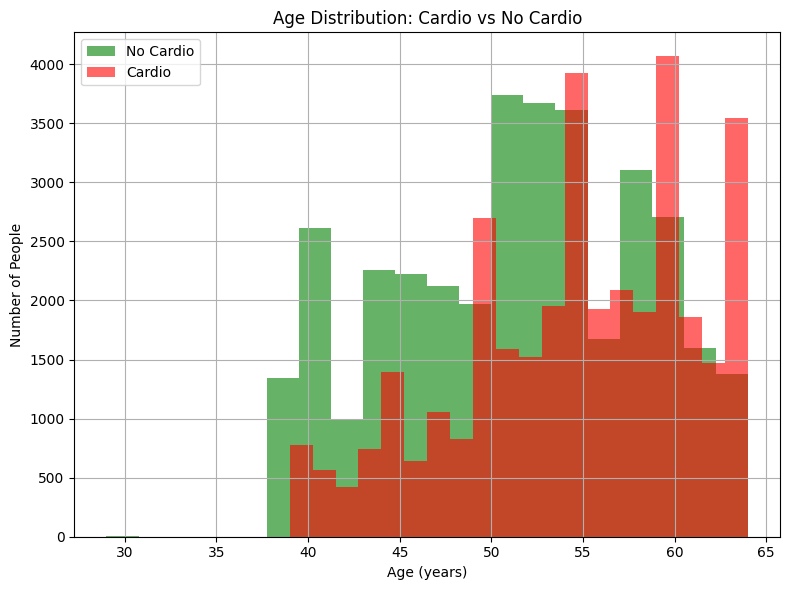

In [72]:
# Convert age to years
df['age_years'] = df['age'] // 365

# Create histograms
plt.figure(figsize=(8,6))
plt.hist(df[df['cardio'] == 0]['age_years'], bins=20, color='green', alpha=0.6, label='No Cardio')
plt.hist(df[df['cardio'] == 1]['age_years'], bins=20, color='red', alpha=0.6, label='Cardio')

plt.xlabel('Age (years)')
plt.ylabel('Number of People')
plt.title('Age Distribution: Cardio vs No Cardio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## What It Means:
> **Perfect (bell curve):** Most people are around the average age, fewer are very young or very old. <br>
> **Left-skewed (tail on left):** More older people, fewer young ones. <br>
> **Right-skewed (tail on right):** More young people, fewer older ones. <br>
> **Flat (uniform):** All ages are equally common (rare in real life). <br>

A normal distribution is used to understand how things naturally spread out — like height, weight, or test scores. It's shaped like a bell curve, where most values are in the middle, and very few are really low or really high

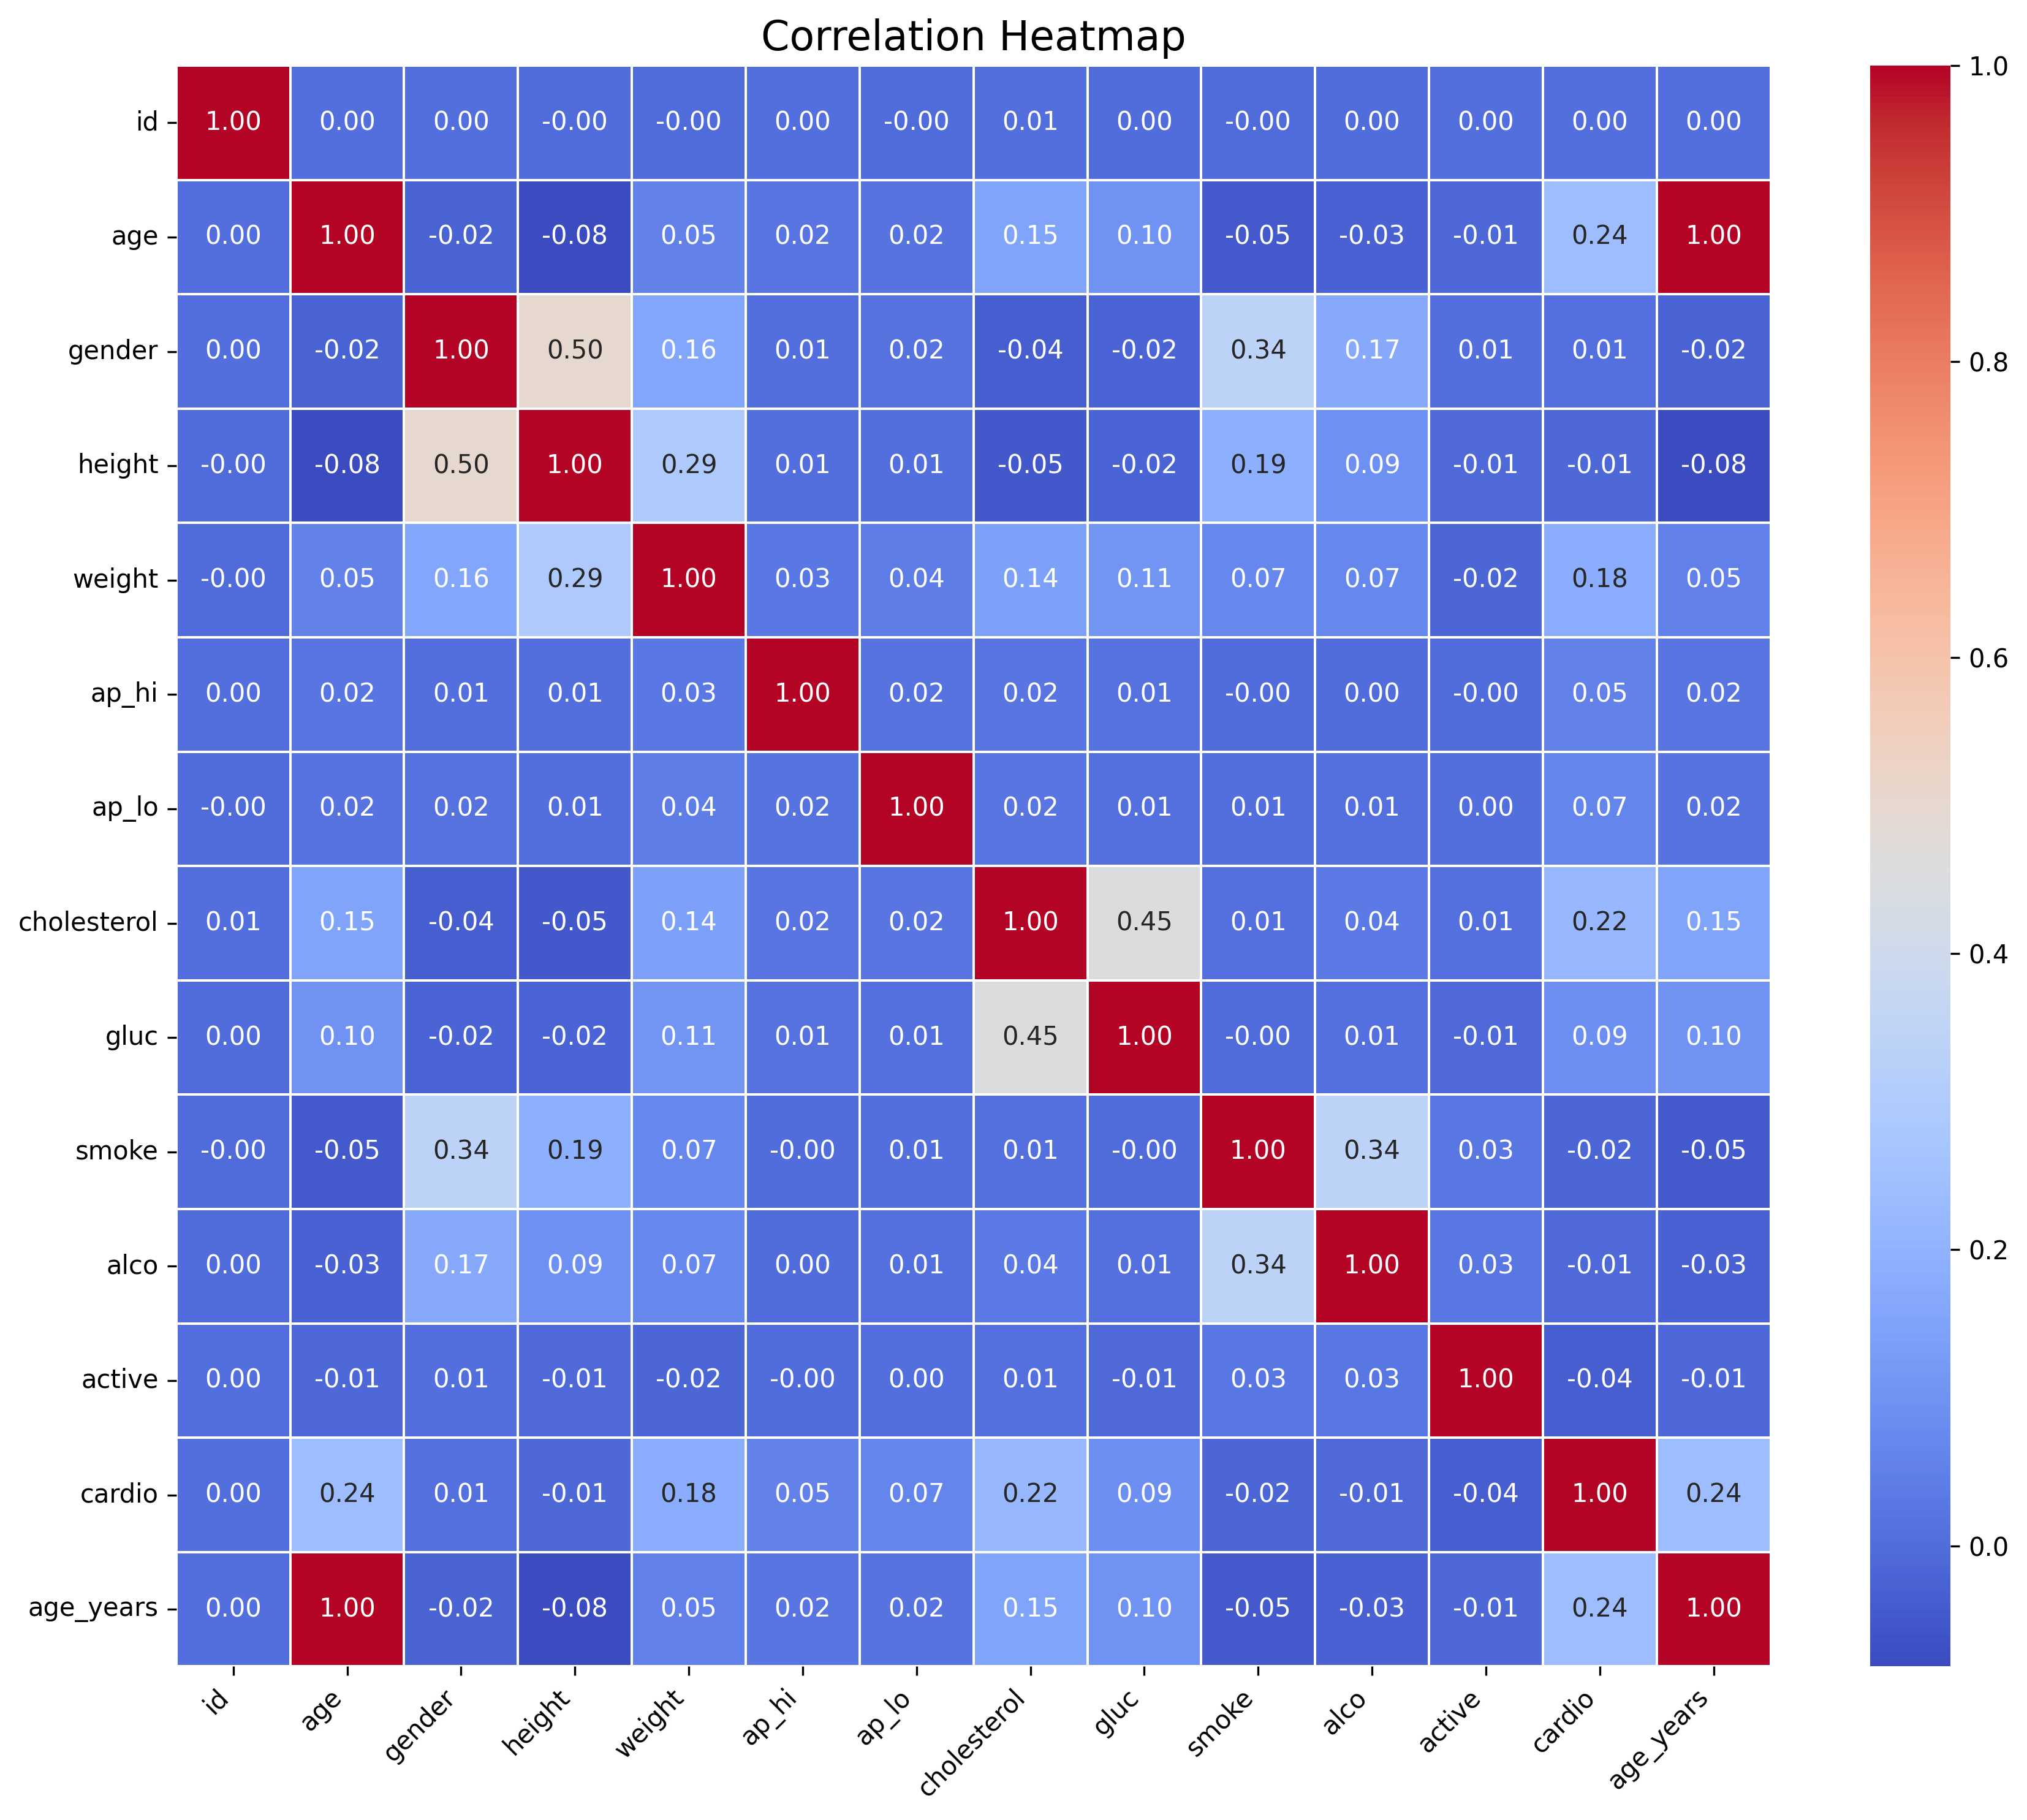

In [73]:
corr = df.corr(numeric_only=True)
# Plot heatmap
plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


### 📊 Understanding Correlation

**Correlation** means how two things change together — like age and weight.

- **Positive correlation** → As one goes up, the other also goes up  
  *(Example: More study hours → higher test score)*

- **Negative correlation** → As one goes up, the other goes down  
  *(Example: More sleep deprivation → lower focus)*

- **Correlation value range:**
  - `-1` = Perfect negative correlation  
  - `0`  = No relationship  
  - `+1` = Perfect positive correlation  


In [74]:
from sklearn.preprocessing import StandardScaler
# Step 3: Split features and target
X = df.drop('cardio', axis=1)   # Features
y = df['cardio']                # Target (0 = no disease, 1 = has disease)

# Step 4: Feature scaling (important for some models like Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Choose a model
model = LogisticRegression(max_iter=1000)

# Step 6: Apply 5-Fold Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Step 7: Print scores
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", np.mean(scores))

Accuracy scores for each fold: [0.71378571 0.72485714 0.71728571 0.72814286 0.71792857]
Mean accuracy: 0.7204


## Suggested Models

- **Logistic Regression**  
- **Random Forest Classifier**  
- **XGBoost Classifier**  
- **LightGBM Classifier**  
- **HistGradientBoostingClassifier** (scikit‑learn)  
- **VotingClassifier** (soft/hard voting ensemble)  
- **StackingClassifier** (meta‑learner ensemble)


In [75]:
# Standardization is helpful for many models (like LR)
scaler = StandardScaler()

# Define models
logreg = make_pipeline(scaler, LogisticRegression(max_iter=1000))
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
hgb = HistGradientBoostingClassifier()

# Create ensemble models
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('rf', rf), ('xgb', xgb)],
    voting='soft'
)

stacking_clf = StackingClassifier(
    estimators=[('lr', logreg), ('rf', rf), ('xgb', xgb)],
    final_estimator=LogisticRegression()
)

# Dictionary of models to test
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "HistGradientBoosting": hgb,
    "Voting Classifier": voting_clf,
    "Stacking Classifier": stacking_clf
}

# Evaluate all models using 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Fold Scores = {np.round(scores, 4)}")

Logistic Regression: Mean Accuracy = 0.7203, Fold Scores = [0.7136 0.725  0.7172 0.7278 0.7179]
Random Forest: Mean Accuracy = 0.6787, Fold Scores = [0.5382 0.7296 0.723  0.7271 0.6753]
XGBoost: Mean Accuracy = 0.7025, Fold Scores = [0.6744 0.6836 0.7234 0.7353 0.6956]
HistGradientBoosting: Mean Accuracy = 0.7314, Fold Scores = [0.7163 0.7404 0.733  0.7365 0.7309]
Voting Classifier: Mean Accuracy = 0.7201, Fold Scores = [0.6914 0.73   0.729  0.7375 0.7124]
Stacking Classifier: Mean Accuracy = 0.7254, Fold Scores = [0.7128 0.7349 0.7263 0.7344 0.7189]


## Results are given:
>**Logistic Regression:** Mean Accuracy = 0.7203, Fold Scores = [0.7136 0.725  0.7172 0.7278 0.7179]<br>
**Random Forest:** Mean Accuracy = 0.6878, Fold Scores = [0.5877 0.7294 0.7243 0.7248 0.6729]<br>
**XGBoost:** Mean Accuracy = 0.7025, Fold Scores = [0.6744 0.6836 0.7234 0.7353 0.6956]<br>
**HistGradientBoosting:** Mean Accuracy = 0.7321, Fold Scores = [0.7208 0.7406 0.7319 0.738  0.7291]<br>
**Voting Classifier:** Mean Accuracy = 0.7191, Fold Scores = [0.6874 0.7269 0.7299 0.7381 0.7134]<br>
**Stacking Classifier:** Mean Accuracy = 0.7244, Fold Scores = [0.7105 0.7349 0.7263 0.7336 0.7166]

Use HistGradientBoostingClassifier as your final model to deploy on your website. It gave the highest mean accuracy and consistent scores across folds.


==================== TEST PERFORMANCE ====================
Accuracy: 0.7350
Recall: 0.6890
Precision: 0.7544
F1 Score: 0.7202
ROC-AUC: 0.8014
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      5187
           1       0.75      0.69      0.72      5087

    accuracy                           0.73     10274
   macro avg       0.74      0.73      0.73     10274
weighted avg       0.74      0.73      0.73     10274


Optimal Threshold: 0.36
Optimized Recall: 0.8331
Optimized Precision: 0.6652
Optimized F1 Score: 0.7397


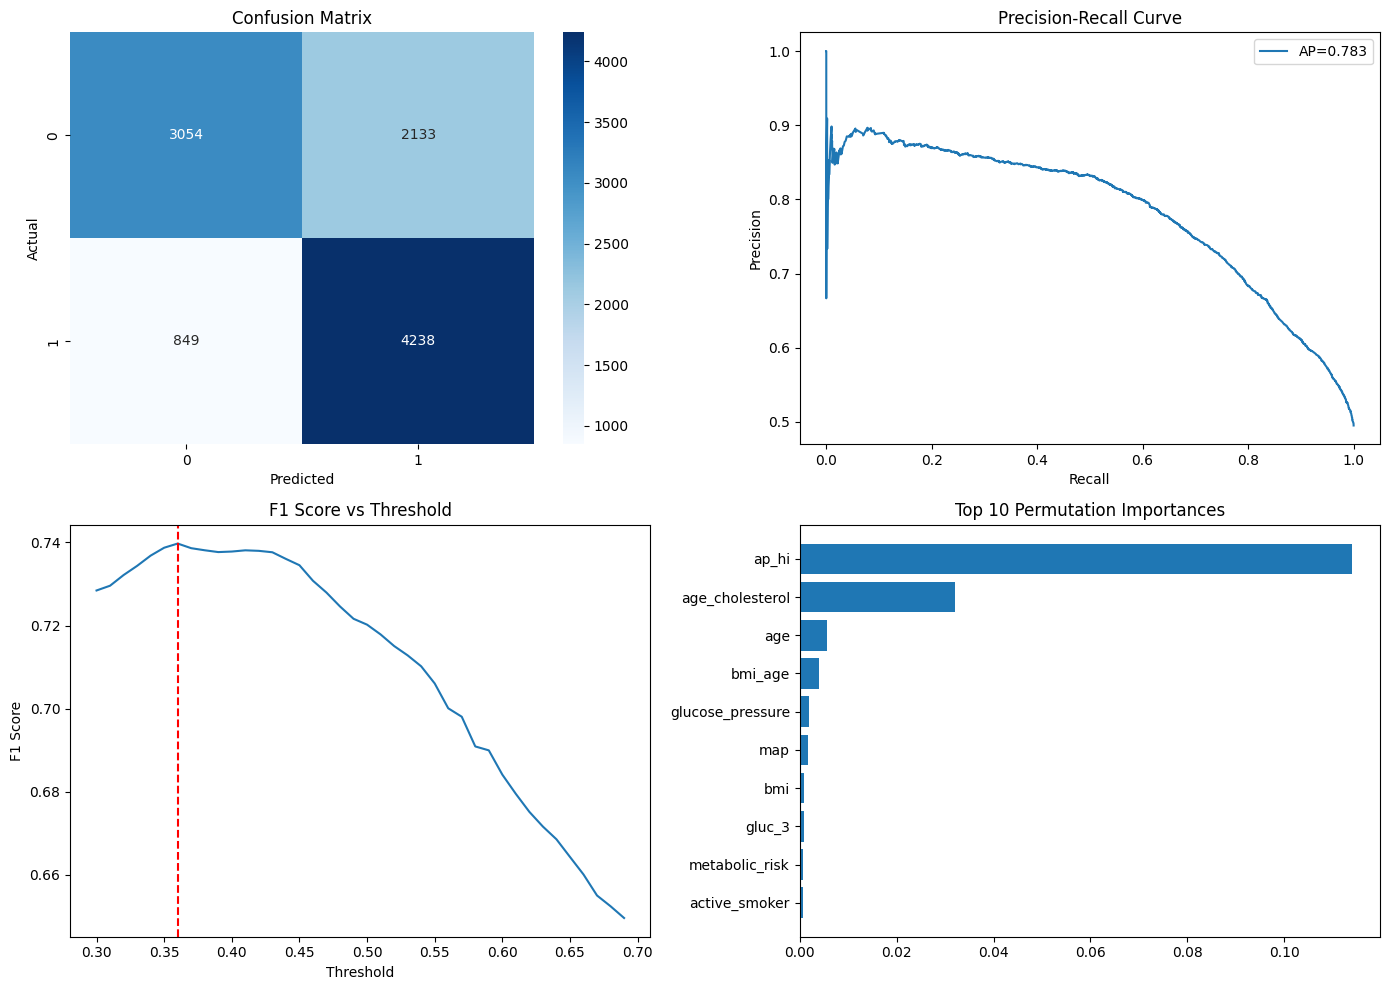

In [4]:
# ===============================
# Cardiovascular Risk Model (Optimized)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, 
                             precision_recall_curve, average_precision_score,
                             f1_score, recall_score, precision_score)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import permutation_importance
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import xgboost as xgb
import warnings


# =====================
# Load and Preprocess Data
# =====================
df = pd.read_csv('cardio_train.csv', sep=';')
df['age'] = np.floor(df['age'] / 365.25).astype(int)
df['bmi'] = df['weight'] / (df['height']/100)**2
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['map'] = (2*df['ap_lo'] + df['ap_hi']) / 3

df['hypertension'] = ((df['ap_hi'] >= 140) | (df['ap_lo'] >= 90)).astype(int)
df['age_group'] = pd.cut(df['age'], [30, 40, 50, 60, 70], labels=['30-40', '40-50', '50-60', '60-70'])
df['bmi_hypertension'] = df['bmi'] * df['hypertension']
df['age_cholesterol'] = df['age'] * df['cholesterol']
df['active_smoker'] = df['active'] * df['smoke']
df['glucose_pressure'] = df['gluc'] * (df['ap_hi'] + df['ap_lo']) / 2
df['bmi_age'] = df['bmi'] * df['age'] / 100
df['hdl_ratio'] = df['cholesterol'] / (df['ap_hi'] - 50)
df['arterial_stress'] = (df['ap_hi'] * df['cholesterol']) / (df['age'] + 1)
df['metabolic_risk'] = df['bmi'] * df['cholesterol'] * df['gluc'] / 1000

df = df[(df['ap_hi'] >= 90) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 150)]
df = df[df['ap_hi'] > df['ap_lo']]

# Features
categorical_features = ['cholesterol', 'gluc', 'age_group']
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'pulse_pressure', 'map',
                      'hypertension', 'bmi_hypertension', 'age_cholesterol', 'active_smoker',
                      'glucose_pressure', 'bmi_age', 'hdl_ratio', 'arterial_stress', 'metabolic_risk']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
])

# Target
X = df.drop('cardio', axis=1)
y = df['cardio']

# Class weights
class_weights = dict(zip(np.unique(y), compute_class_weight('balanced', classes=np.unique(y), y=y)))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_prep, y_train)

# Model params
hgb = HistGradientBoostingClassifier(max_iter=600, max_depth=15, max_leaf_nodes=80,
                                     min_samples_leaf=25, l2_regularization=0.2,
                                     max_bins=255, learning_rate=0.05, class_weight=class_weights,
                                     random_state=42)
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', learning_rate=0.05,
                               num_leaves=50, max_depth=12, min_data_in_leaf=30, lambda_l2=0.5,
                               feature_fraction=0.8, bagging_fraction=0.8, bagging_freq=5,
                               class_weight=class_weights, verbosity=-1, random_state=42)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.05, max_depth=8,
                               min_child_weight=10, subsample=0.8, colsample_bytree=0.8,
                               gamma=0.1, reg_alpha=0.5, reg_lambda=0.5,
                               scale_pos_weight=class_weights[1]/class_weights[0],
                               verbosity=0, random_state=42)

# Ensemble
ensemble = VotingClassifier(estimators=[('hgb', hgb), ('lgb', lgb_model), ('xgb', xgb_model)],
                            voting='soft', weights=[1, 1.2, 1])
model = CalibratedClassifierCV(ensemble, method='isotonic', cv=5)
model.fit(X_resampled, y_resampled)

# Predictions
y_pred = model.predict(X_test_prep)
y_proba = model.predict_proba(X_test_prep)[:, 1]

# Metrics
print("\n==================== TEST PERFORMANCE ====================")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Threshold tuning
thresholds = np.arange(0.3, 0.7, 0.01)
f1s = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_thresh = thresholds[np.argmax(f1s)]

print("\nOptimal Threshold:", round(best_thresh, 2))
opt_pred = (y_proba >= best_thresh).astype(int)
print(f"Optimized Recall: {recall_score(y_test, opt_pred):.4f}")
print(f"Optimized Precision: {precision_score(y_test, opt_pred):.4f}")
print(f"Optimized F1 Score: {f1_score(y_test, opt_pred):.4f}")

# Feature names
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Visualizations
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, opt_pred), annot=True, fmt='d', cmap='Blues', ax=axs[0,0])
axs[0,0].set_title("Confusion Matrix")
axs[0,0].set_xlabel("Predicted")
axs[0,0].set_ylabel("Actual")

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
axs[0,1].plot(recall_vals, precision_vals, label=f"AP={average_precision_score(y_test, y_proba):.3f}")
axs[0,1].set_title("Precision-Recall Curve")
axs[0,1].set_xlabel("Recall")
axs[0,1].set_ylabel("Precision")
axs[0,1].legend()

# F1 vs Threshold
axs[1,0].plot(thresholds, f1s)
axs[1,0].axvline(best_thresh, color='red', linestyle='--')
axs[1,0].set_title("F1 Score vs Threshold")
axs[1,0].set_xlabel("Threshold")
axs[1,0].set_ylabel("F1 Score")

# Permutation Importance
perm_result = permutation_importance(model, X_test_prep, y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = perm_result.importances_mean.argsort()[-10:]
axs[1,1].barh(np.array(feature_names)[sorted_idx], perm_result.importances_mean[sorted_idx])
axs[1,1].set_title("Top 10 Permutation Importances")

plt.tight_layout()
plt.show()

| Tool                 | Helps With                                 |
|----------------------|---------------------------------------------|
| **ROC-AUC**          | Measuring how well your model classifies   |
| **RandomizedSearchCV** | Finding best settings for better accuracy |


In [5]:
import joblib

# Save the calibrated model
joblib.dump(model, 'cardio_risk_model.pkl')

# Save the preprocessing pipeline
joblib.dump(preprocessor, 'cardio_preprocessor.pkl')

print("Model and preprocessor saved successfully.")


Model and preprocessor saved successfully.
